## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import *

%matplotlib inline


mp = ixmp.Platform()


<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


## Clone baseline and create emission bound scenario

In [2]:
# this is to import scenario from data base and clone to local
base = message_ix.Scenario(mp, model='ENGAGE_SSP2_v4.1.7', scenario="NPi2020_Prime")
scen = base.clone(
    "GENIE_sandbox",
    "daccs1000_paper_repro",
    "adding daccs and mission bound to baseline scenario",
    keep_solution=False, 
)
scen.check_out()

year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")


In [3]:
# add daccs
filepath = 'C:/Users/pratama/Documents/GitHub/MESSAGEix/message_ix/tutorial/dac_scenarios/data/tech_data.yaml'
add_dac(scen,filepath=filepath)

#### Add emission bound

In [4]:
# add emission bound
scen.add_par('bound_emission', ['World', 'TCE_CO2', 'all', 'cumulative'], value=2421.17, unit="tC")

## Run the model

In [5]:
scen.commit(comment="DACs scenario with emission bound")
scen.set_as_default()
scen.solve(solve_options={'barcrossalg': '2','scaind':'1'})
scen.var("OBJ")["lvl"]

3254907.5

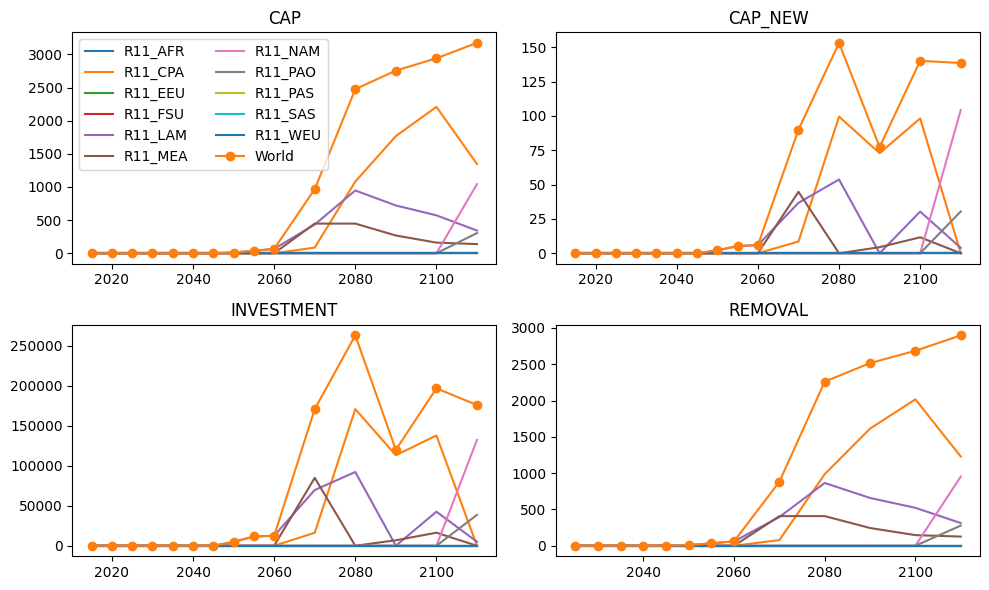

In [6]:
# Get Report
scenario = message_ix.Scenario(mp, model="GENIE_sandbox", scenario="daccs1000_paper_repro")
scenariotec = ['dac_1','dac_2','dac_3','dac_4','dac_5']

scenario_report = get_report(scenario,scenariotec)


## Close connection

In [7]:
mp.close_db()